In [177]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_columns', None)

## 在这里定义一些必要的函数:heart_eyes:

In [178]:
# Defining some important function which will be used for the analysis of data
def inspect_columns(df):
    """A helper function that does a better job than df.info() and df.describe()"""
    
    total_rows = len(df)
    result = pd.DataFrame({
        'total_rows': [total_rows] * df.shape[1],
        'rows_with_missing_values': df.isnull().sum(),
        'unique': df.nunique() == total_rows,
        'cardinality': df.nunique(),
        'with_null': df.isna().any(),
        'null_pct': round((df.isnull().sum() / total_rows) * 100, 2),
        '1st_row': df.iloc[0],
        'random_row': df.iloc[np.random.randint(low=0, high=total_rows)],
        'last_row': df.iloc[-1],
        'dtype': df.dtypes,

    })
    
    return result

def categorize_columns(train, target_variable):
    numerical_data_types = ['int64', 'float64', 'datetime64[ns]']  # adjusted data types
    categorical_data_types = ['object']

    numerical_columns = [column for column in train.columns if train[column].dtype in numerical_data_types]
    print(f"Numerical variables ({len(numerical_columns)}): {numerical_columns}")

    categorical_columns = [column for column in train.columns if train[column].dtype in categorical_data_types]
    
    if target_variable in categorical_columns:
        categorical_columns.remove(target_variable)
    print(f"Categorical variables ({len(categorical_columns)}): {categorical_columns}")

    return numerical_columns, categorical_columns

# 读取数据

In [179]:
path = '../../data/titanic'
print(os.path.abspath(path))
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

e:\量化\MyKaggle\data\titanic
../../data/titanic\gender_submission.csv
../../data/titanic\test.csv
../../data/titanic\train.csv


In [180]:
train_data_path = os.path.join(path, 'train.csv')
test_data_path = os.path.join(path, 'test.csv')
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 读完数据后看看整体的数据信息:kiss:

In [181]:
print('checking the data health of the train data')
display(inspect_columns(train_data))

checking the data health of the train data


,total_rows,rows_with_missing_values,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
PassengerId,891,0,True,891,False,0.00,1,375,891,int64
Survived,891,0,False,2,False,0.00,0,0,0,int64
Pclass,891,0,False,3,False,0.00,3,3,3,int64
Name,891,0,True,891,False,0.00,"Braund, Mr. Owen Harris","Palsson, Miss. Stina Viola","Dooley, Mr. Patrick",object
Sex,891,0,False,2,False,0.00,male,female,male,object
Age,891,177,False,88,True,19.87,22.0,3.0,32.0,float64
SibSp,891,0,False,7,False,0.00,1,3,0,int64
Parch,891,0,False,7,False,0.00,0,1,0,int64
Ticket,891,0,False,681,False,0.00,A/5 21171,349909,370376,object
Fare,891,0,False,248,False,0.00,7.25,21.075,7.75,float64


In [182]:
print('checking the data health of the test data')
display(inspect_columns(test_data))

checking the data health of the test data


,total_rows,rows_with_missing_values,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
PassengerId,418,0,True,418,False,0.00,892,893,1309,int64
Pclass,418,0,False,3,False,0.00,3,3,3,int64
Name,418,0,True,418,False,0.00,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Peter, Master. Michael J",object
Sex,418,0,False,2,False,0.00,male,female,male,object
Age,418,86,False,79,True,20.57,34.5,47.0,NaN,float64
SibSp,418,0,False,7,False,0.00,0,1,1,int64
Parch,418,0,False,8,False,0.00,0,0,1,int64
Ticket,418,0,False,363,False,0.00,330911,363272,2668,object
Fare,418,1,False,169,True,0.24,7.8292,7.0,22.3583,float64
Cabin,418,327,False,76,True,78.23,NaN,NaN,NaN,object


由于存货与否是01哑变量，所以求和/计数就是为1的比率:smile:

In [183]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
women_rate = sum(women)/len(women)
print('proportion of women who survived:',women_rate)
print(len(women))

proportion of women who survived: 0.7420382165605095
314


In [184]:
men = train_data.loc[train_data.Sex == 'male']['Survived']
men_rate = sum(men)/len(men)
print('proportion of men who survived:',men_rate)
print(len(men))

proportion of men who survived: 0.18890814558058924
577


In [185]:
train_data.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [186]:
train_data.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [187]:
train_data.Embarked.unique()[3]

nan

In [188]:
train_data.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [189]:
for i in train_data.Pclass.unique():
    Pclass = train_data.loc[train_data.Pclass == i]['Survived']
    Pclass_rate = sum(Pclass)/len(Pclass)
    print('number of Pclass {} :'.format(i), len(Pclass))
    print(f'proportion of Pclass {i} who survived:',Pclass_rate)
    print('-'*20)

number of Pclass 3 : 491
proportion of Pclass 3 who survived: 0.24236252545824846
--------------------
number of Pclass 1 : 216
proportion of Pclass 1 who survived: 0.6296296296296297
--------------------
number of Pclass 2 : 184
proportion of Pclass 2 who survived: 0.47282608695652173
--------------------


In [190]:
o = 0
for i in train_data.Embarked.unique():
    if o>2:break
    Embarked = train_data.loc[train_data.Embarked == i]['Survived']
    Embarked_rate = sum(Embarked)/len(Embarked)
    print('number of people who embarked at',i,':',len(Embarked))
    print(f'proportion of people who embarked at {i} and survived:',Embarked_rate)
    print('-'*20)
    o += 1

number of people who embarked at S : 644
proportion of people who embarked at S and survived: 0.33695652173913043
--------------------
number of people who embarked at C : 168
proportion of people who embarked at C and survived: 0.5535714285714286
--------------------
number of people who embarked at Q : 77
proportion of people who embarked at Q and survived: 0.38961038961038963
--------------------


In [191]:
for i in train_data.Parch.unique():
    parch = train_data.loc[train_data.Parch == i]['Survived']
    parch_rate = sum(parch)/len(parch)
    print('number of parch {} :'.format(i),len(parch))
    print('proportion of parch {} who survived:'.format(i),parch_rate)
    print('-'*20)

number of parch 0 : 678
proportion of parch 0 who survived: 0.34365781710914456
--------------------
number of parch 1 : 118
proportion of parch 1 who survived: 0.5508474576271186
--------------------
number of parch 2 : 80
proportion of parch 2 who survived: 0.5
--------------------
number of parch 5 : 5
proportion of parch 5 who survived: 0.2
--------------------
number of parch 3 : 5
proportion of parch 3 who survived: 0.6
--------------------
number of parch 4 : 4
proportion of parch 4 who survived: 0.0
--------------------
number of parch 6 : 1
proportion of parch 6 who survived: 0.0
--------------------


In [192]:
for i in train_data.SibSp.unique():
    sibsp = train_data.loc[train_data.SibSp == i]['Survived']
    sibsp_rate = sum(sibsp)/len(sibsp)
    print('number of sibsp {} :'.format(i),len(sibsp))
    print('proportion of sibsp {} who survived:'.format(i),sibsp_rate)

number of sibsp 1 : 209
proportion of sibsp 1 who survived: 0.5358851674641149
number of sibsp 0 : 608
proportion of sibsp 0 who survived: 0.34539473684210525
number of sibsp 3 : 16
proportion of sibsp 3 who survived: 0.25
number of sibsp 4 : 18
proportion of sibsp 4 who survived: 0.16666666666666666
number of sibsp 2 : 28
proportion of sibsp 2 who survived: 0.4642857142857143
number of sibsp 5 : 5
proportion of sibsp 5 who survived: 0.0
number of sibsp 8 : 7
proportion of sibsp 8 who survived: 0.0


## 考虑到数量和显著性，发现SibSp和Parch两个变量都只有在值等于0时有效:police_car:
对几个显著影响存货的变量进行标签

In [193]:
train_data['is_Parch_0'] = train_data.Parch.apply(lambda x: 1 if x == 0 else 0)
test_data['is_Parch_0'] = test_data.Parch.apply(lambda x: 1 if x == 0 else 0)
train_data['is_SibSp_0'] = train_data.SibSp.apply(lambda x: 1 if x == 0 else 0)
test_data['is_SibSp_0'] = test_data.SibSp.apply(lambda x: 1 if x == 0 else 0)
train_data['is_Embarked_S'] = train_data.Embarked.apply(lambda x: 1 if x == 'S' else 0)
test_data['is_Embarked_S'] = test_data.Embarked.apply(lambda x: 1 if x == 'S' else 0)
train_data['is_Embarked_Q'] = train_data.Embarked.apply(lambda x: 1 if x == 'Q' else 0)
test_data['is_Embarked_Q'] = test_data.Embarked.apply(lambda x: 1 if x == 'Q' else 0)
# train_data['is_Embarked_3'] = train_data.Embarked.apply(lambda x: 1 if x == 3 else 0)
# test_data['is_Embarked_3'] = test_data.Embarked.apply(lambda x: 1 if x == 3 else 0)
train_data['gender'] = train_data.Sex.apply(lambda x: 1 if x == 'female' else 0)
test_data['gender'] = test_data.Sex.apply(lambda x: 1 if x == 'female' else 0)
train_data['is_Pclass_1'] = train_data.Pclass.apply(lambda x: 1 if x == 1 else 0)
test_data['is_Pclass_1'] = test_data.Pclass.apply(lambda x: 1 if x == 1 else 0)
test_data['is_Pclass_3'] = test_data.Pclass.apply(lambda x: 1 if x == 3 else 0)
train_data['is_Pclass_3'] = train_data.Pclass.apply(lambda x: 1 if x == 3 else 0)

train_data['is_cabin_null'] = train_data.Cabin.apply(lambda x: 1 if pd.isnull(x) else 0)
test_data['is_cabin_null'] = test_data.Cabin.apply(lambda x: 1 if pd.isnull(x) else 0)

In [194]:
is_cabin_null = train_data.loc[train_data.is_cabin_null == 1]['Survived']
is_cabin_null_rate = sum(is_cabin_null)/len(is_cabin_null)
print('number of people with null cabin:',len(is_cabin_null))
print(f'proportion of people with null cabin who survived:',is_cabin_null_rate)

number of people with null cabin: 687
proportion of people with null cabin who survived: 0.29985443959243085


In [195]:
# train_data['is_teens'] = train_data.Age.apply(lambda x: 1 if x < 18 else 0)
# test_data['is_teens'] = test_data.Age.apply(lambda x: 1 if x < 18 else 0)
# train_data['is_adults'] = train_data.Age.apply(lambda x: 1 if x >= 18 and x <50 else 0)
# test_data['is_adults'] = test_data.Age.apply(lambda x: 1 if x >= 18 and x <50 else 0)
# # train_data['is_elderly'] = train_data.Age.apply(lambda x: 1 if x >= 50 else 0)
# # test_data['is_elderly'] = test_data.Age.apply(lambda x: 1 if x >= 50 else 0)
# for table in [train_data,test_data]:
#     for inx in table.index:
#         if pd.isnull(table.loc[inx,'Age']):
#             table.loc[inx,'is_teens'] = None
#             table.loc[inx,'is_adults'] = None
#             table.loc[inx,'is_elderly'] = None 

        

In [196]:
lower_than_i_list = []
higher_than_i_list = []
xxx = []
for i in range(20,61):
    xxx.append(i)
    train_data['lower_than_i'] = train_data.Age.apply(lambda x: 1 if x < i else 0)
    lower_than_i = train_data.loc[train_data.lower_than_i == 1]['Survived']
    higher_than_i = train_data.loc[train_data.lower_than_i == 0]['Survived']
    lower_than_i_rate = sum(lower_than_i)/len(lower_than_i)
    higher_than_i_rate = sum(higher_than_i)/len(higher_than_i)
    lower_than_i_list.append(lower_than_i_rate)
    higher_than_i_list.append(higher_than_i_rate)
    # print('number of people lower than {} :'.format(i),len(lower_than_i))
    # print('proportion of people lower than {} who survived:'.format(i),lower_than_i_rate)
    print('number of people higher than {} :'.format(i),len(higher_than_i))
    # print('proportion of people higher than {} who survived:'.format(i),higher_than_i_rate)

number of people higher than 20 : 727
number of people higher than 21 : 711
number of people higher than 22 : 687
number of people higher than 23 : 660
number of people higher than 24 : 644
number of people higher than 25 : 613
number of people higher than 26 : 590
number of people higher than 27 : 572
number of people higher than 28 : 554
number of people higher than 29 : 527
number of people higher than 30 : 507
number of people higher than 31 : 480
number of people higher than 32 : 463
number of people higher than 33 : 443
number of people higher than 34 : 428
number of people higher than 35 : 412
number of people higher than 36 : 394
number of people higher than 37 : 371
number of people higher than 38 : 365
number of people higher than 39 : 354
number of people higher than 40 : 340
number of people higher than 41 : 325
number of people higher than 42 : 319
number of people higher than 43 : 306
number of people higher than 44 : 301
number of people higher than 45 : 292
number of pe

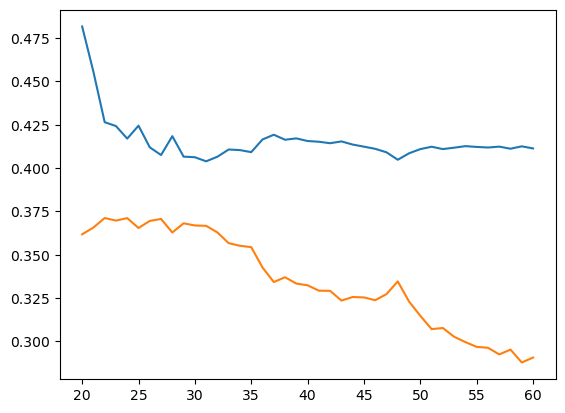

In [197]:
import matplotlib.pyplot as plt
plt.plot(xxx,lower_than_i_list)
plt.plot(xxx,higher_than_i_list)
plt.show()

In [198]:
lower_than_i_list = []
higher_than_i_list = []
xxx = []
for i in range(1,61,5):
    xxx.append(i)
    train_data['lower_than_i'] = train_data.Fare.apply(lambda x: 1 if x < i else 0)
    lower_than_i = train_data.loc[train_data.lower_than_i == 1]['Survived']
    higher_than_i = train_data.loc[train_data.lower_than_i == 0]['Survived']
    lower_than_i_rate = sum(lower_than_i)/len(lower_than_i)
    higher_than_i_rate = sum(higher_than_i)/len(higher_than_i)
    lower_than_i_list.append(lower_than_i_rate)
    higher_than_i_list.append(higher_than_i_rate)
    print('number of people lower than {} :'.format(i),len(lower_than_i))
    # print('proportion of people lower than {} who survived:'.format(i),lower_than_i_rate)
    print('number of people higher than {} :'.format(i),len(higher_than_i))
    # print('proportion of people higher than {} who survived:'.format(i),higher_than_i_rate)

number of people lower than 1 : 15
number of people higher than 1 : 876
number of people lower than 6 : 17
number of people higher than 6 : 874
number of people lower than 11 : 364
number of people higher than 11 : 527
number of people lower than 16 : 484
number of people higher than 16 : 407
number of people lower than 21 : 524
number of people higher than 21 : 367
number of people lower than 26 : 565
number of people higher than 26 : 326
number of people lower than 31 : 666
number of people higher than 31 : 225
number of people lower than 36 : 697
number of people higher than 36 : 194
number of people lower than 41 : 716
number of people higher than 41 : 175
number of people lower than 46 : 720
number of people higher than 46 : 171
number of people lower than 51 : 732
number of people higher than 51 : 159
number of people lower than 56 : 755
number of people higher than 56 : 136


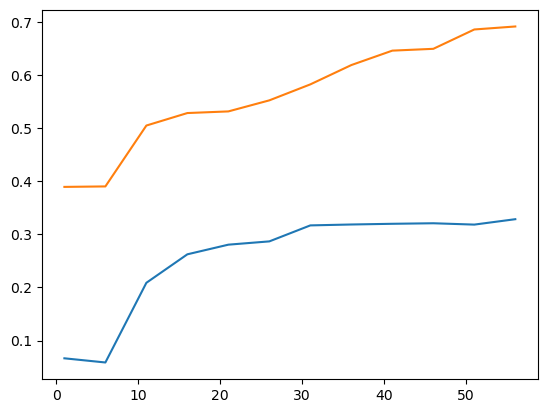

In [199]:
plt.plot(xxx,lower_than_i_list)
plt.plot(xxx,higher_than_i_list)
plt.show()

## 综上，选择60为分界点

In [200]:
def age_group(age):
    if age >= 60:
        return 1
    elif age < 60:
        return 0
    else:
        return None
train_data['is_elderly'] = train_data.Age.apply(age_group)
test_data['is_elderly'] = test_data.Age.apply(age_group)
for table in [train_data,test_data]:
    for inx in table.index:
        table.loc[inx,'is_elderly'] = None if pd.isnull(table.loc[inx,'Age']) else table.loc[inx,'is_elderly']
# train_data['is_elderly'] = train_data['is_elderly'].astype('int')
# train_data['is_elderly'].unique()

## 由于要回归填补年龄，剩下的数量足够的变量也进行标签:kiss::fire::heart_eyes:

In [201]:
train_data['is_SibSp_1'] = train_data.SibSp.apply(lambda x: 1 if x == 1 else 0)
test_data['is_SibSp_1'] = test_data.SibSp.apply(lambda x: 1 if x == 1 else 0)
train_data['is_Pclass_2'] = train_data.Pclass.apply(lambda x: 1 if x == 2 else 0)   
test_data['is_Pclass_2'] = test_data.Pclass.apply(lambda x: 1 if x == 2 else 0)
train_data['is_Parch_1'] = train_data.Parch.apply(lambda x: 1 if x == 1 else 0)
test_data['is_Parch_1'] = test_data.Parch.apply(lambda x: 1 if x == 1 else 0)

## age存在缺失值，但极为重要，因此对缺失值进行回归填补
使用mlb和GradientBoostingRegressor

In [202]:
test_data[test_data['Fare'].isnull()].head()
#train_data[train_data['Fare'].isnull()].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_Parch_0,is_SibSp_0,is_Embarked_S,is_Embarked_Q,gender,is_Pclass_1,is_Pclass_3,is_cabin_null,is_elderly,is_SibSp_1,is_Pclass_2,is_Parch_1
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,1,1,1,0,0,0,1,1,1.0,0,0,0


In [203]:
fare = train_data.loc[train_data.SibSp == 0]
fare = fare.loc[fare.Parch == 0]
fare = fare.loc[fare.Pclass == 3]
fare = fare.loc[fare.gender == 0]
fare = fare.loc[fare.Embarked == 'S']
fare['Fare'].mean()

9.861667821782177

In [204]:
test_data.loc[test_data['Fare'].isnull(),'Fare'] = fare['Fare'].mean()
test_data.iloc[152]

PassengerId                    1044
Pclass                            3
Name             Storey, Mr. Thomas
Sex                            male
Age                            60.5
SibSp                             0
Parch                             0
Ticket                         3701
Fare                       9.861668
Cabin                           NaN
Embarked                          S
is_Parch_0                        1
is_SibSp_0                        1
is_Embarked_S                     1
is_Embarked_Q                     0
gender                            0
is_Pclass_1                       0
is_Pclass_3                       1
is_cabin_null                     1
is_elderly                      1.0
is_SibSp_1                        0
is_Pclass_2                       0
is_Parch_1                        0
Name: 152, dtype: object

In [205]:
age_features = ['PassengerId', 'is_elderly', 'is_Pclass_1', 'is_Pclass_2', 'is_Pclass_3', 'is_SibSp_0', 'is_SibSp_1', 'is_Parch_0', 'is_Parch_1', 'is_Embarked_S', 'is_Embarked_Q']
X_train = train_data[age_features]
X_test = test_data[age_features]
merged = pd.concat([X_train, X_test])

merged

,PassengerId,is_elderly,is_Pclass_1,is_Pclass_2,is_Pclass_3,is_SibSp_0,is_SibSp_1,is_Parch_0,is_Parch_1,is_Embarked_S,is_Embarked_Q
0,1,0.0,0,0,1,0,1,1,0,1,0
1,2,0.0,1,0,0,0,1,1,0,0,0
2,3,0.0,0,0,1,1,0,1,0,1,0
3,4,0.0,1,0,0,0,1,1,0,1,0
4,5,0.0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,0,0,1,1,0,1,0,1,0
414,1306,0.0,1,0,0,1,0,1,0,0,0
415,1307,0.0,0,0,1,1,0,1,0,1,0
416,1308,NaN,0,0,1,1,0,1,0,1,0


In [206]:
target_data = merged.loc[merged['is_elderly'].isnull()]
source_data = merged.loc[merged['is_elderly'].notnull()]
Y = source_data['is_elderly']
X = source_data.drop(['PassengerId','is_elderly'], axis=1)
Y = Y.astype('int')
target_data

,PassengerId,is_elderly,is_Pclass_1,is_Pclass_2,is_Pclass_3,is_SibSp_0,is_SibSp_1,is_Parch_0,is_Parch_1,is_Embarked_S,is_Embarked_Q
5,6,NaN,0,0,1,1,0,1,0,0,1
17,18,NaN,0,1,0,1,0,1,0,1,0
19,20,NaN,0,0,1,1,0,1,0,0,0
26,27,NaN,0,0,1,1,0,1,0,0,0
28,29,NaN,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,NaN,0,0,1,1,0,1,0,0,1
410,1302,NaN,0,0,1,1,0,1,0,0,1
413,1305,NaN,0,0,1,1,0,1,0,1,0
416,1308,NaN,0,0,1,1,0,1,0,1,0


In [207]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
randomForestClassifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [208]:
xgb_classifier.fit(X_train, y_train)
randomForestClassifier.fit(X_train, y_train)

xgb_age_rate=xgb_classifier.score(X_test, y_test)
rdf_age_rate=randomForestClassifier.score(X_test, y_test)
print('xgb_age_rate:',xgb_age_rate)
print('rdf_age_rate:',rdf_age_rate)


xgb_age_rate: 0.9809523809523809
rdf_age_rate: 0.9809523809523809


In [209]:
target_data_pred_X = target_data.drop('is_elderly', axis=1)
# target_data_pred_y = xgb_classifier.predict(target_data_pred_X)
target_data_pred_X.set_index('PassengerId', inplace=True)

target_data_pred_y = randomForestClassifier.predict(target_data_pred_X)
target_data_pred_y_df = pd.DataFrame(target_data_pred_y, columns=['is_elderly'], index=target_data_pred_X.index)
target_data_pred_y_df.reset_index(inplace=True)
target_data_pred_y_df

,PassengerId,is_elderly
0,6,0
1,18,0
2,20,0
3,27,0
4,29,0
...,...,...
258,1300,0
259,1302,0
260,1305,0
261,1308,0


In [210]:
train_data['high_fare'] = train_data.Fare.apply(lambda x: 1 if x >40  else 0)
test_data['high_fare'] = test_data.Fare.apply(lambda x: 1 if x > 40 else 0)


In [211]:
# train_data.is_elderly.apply(lambda x: 0 if x.isnull() else x)
train_data['is_elderly'] = train_data.is_elderly.apply(lambda x: 0 if pd.isnull(x) else x)
test_data['is_elderly'] = test_data.is_elderly.apply(lambda x: 0 if pd.isnull(x) else x)
train_data['is_elderly'].astype('int')
test_data['is_elderly'].astype('int')

0      0
1      0
2      1
3      0
4      0
      ..
413    0
414    0
415    0
416    0
417    0
Name: is_elderly, Length: 418, dtype: int32

In [212]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_Parch_0,is_SibSp_0,is_Embarked_S,is_Embarked_Q,gender,is_Pclass_1,is_Pclass_3,is_cabin_null,lower_than_i,is_elderly,is_SibSp_1,is_Pclass_2,is_Parch_1,high_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,0,0,1,1,1,0.0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0,1,1,0,0,0,0.0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1,0,1,0,1,1,1,0.0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,0,1,1,0,0,1,0.0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,1,0,0,0,1,1,1,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1,1,0,0,0,0,1,1,0.0,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1,1,0,1,1,0,0,1,0.0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,0,1,0,1,1,1,0.0,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1,0,0,0,1,0,0,1,0.0,0,0,0,0


In [213]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_Parch_0,is_SibSp_0,is_Embarked_S,is_Embarked_Q,gender,is_Pclass_1,is_Pclass_3,is_cabin_null,is_elderly,is_SibSp_1,is_Pclass_2,is_Parch_1,high_fare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,0,1,0,0,1,1,0.0,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,1,0,1,0,1,1,0.0,1,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,0,1,0,0,0,1,1.0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1,1,0,0,0,1,1,0.0,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,1,0,1,1,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,1,1,0,0,0,1,1,0.0,0,0,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,1,0,0,1,1,0,0,0.0,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,1,1,0,0,0,1,1,0.0,0,0,0,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,1,1,0,0,0,1,1,0.0,0,0,0,0


In [214]:
print(test_data.columns)
print(train_data.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_Parch_0', 'is_SibSp_0',
       'is_Embarked_S', 'is_Embarked_Q', 'gender', 'is_Pclass_1',
       'is_Pclass_3', 'is_cabin_null', 'is_elderly', 'is_SibSp_1',
       'is_Pclass_2', 'is_Parch_1', 'high_fare'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_Parch_0',
       'is_SibSp_0', 'is_Embarked_S', 'is_Embarked_Q', 'gender', 'is_Pclass_1',
       'is_Pclass_3', 'is_cabin_null', 'lower_than_i', 'is_elderly',
       'is_SibSp_1', 'is_Pclass_2', 'is_Parch_1', 'high_fare'],
      dtype='object')


In [215]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
train_data['fare_to_1'] = min_max_scaler.fit_transform(train_data[['Fare']])
test_data['fare_to_1'] = min_max_scaler.transform(test_data[['Fare']])

In [216]:
train_data['age_to_1'] = min_max_scaler.fit_transform(train_data[['Age']])
test_data['age_to_1'] = min_max_scaler.transform(test_data[['Age']])

In [217]:
# features = ['gender','is_Pclass_1', 'is_Pclass_2', 'is_Pclass_3','is_SibSp_1','is_Parch_0','is_SibSp_0','is_Embarked_S','is_Embarked_Q','is_cabin_null', 'is_elderly','high_fare']
features = ['gender','is_Pclass_1', 'is_Pclass_2', 'is_Pclass_3','is_SibSp_1','is_Parch_0', 'is_Parch_1','is_SibSp_0','is_Embarked_S','is_Embarked_Q','is_cabin_null', 'is_elderly','high_fare','fare_to_1']
# features = ['gender','is_Pclass_1', 'is_Pclass_3','is_Parch_0','is_SibSp_0','is_Embarked_S','is_Embarked_Q','is_cabin_null', 'is_elderly','fare_to_1']

X = train_data[features]
y = train_data['Survived']
X_target = test_data[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [218]:
XX = pd.concat([X, X_target])


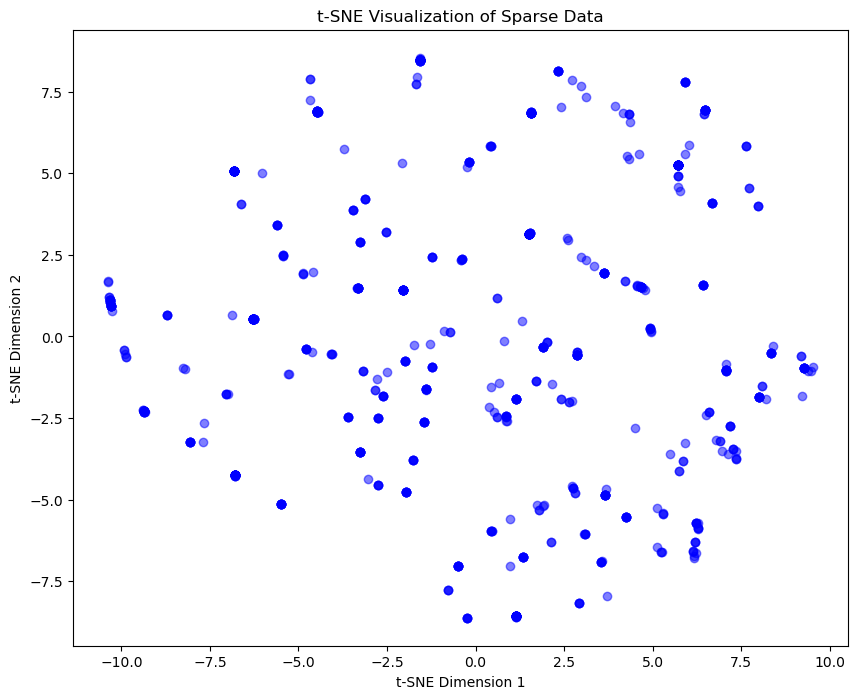

In [219]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 创建t-SNE模型
tsne = TSNE(n_components=2, perplexity=30, learning_rate=0.1, init='random', random_state=42)

# 使用t-SNE对稀疏数据进行降维
X_tsne = tsne.fit_transform(X)

# 绘制可视化结果
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='o', c='b', alpha=0.5)
plt.title('t-SNE Visualization of Sparse Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [220]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 创建t-SNE模型
tsne = TSNE(n_components=2, perplexity=30, learning_rate=0.1, init='random', random_state=42)

# 使用t-SNE对稀疏数据进行降维，并传递标签信息
X_tsne = tsne.fit_transform(X, y)  # 假设y是标签数据

# 获取所有不同标签的值
unique_labels = np.unique(y)

# # 绘制二维可视化结果，为不同标签的点添加颜色和标记
# plt.figure(figsize=(10, 8))
# for label in unique_labels:
#     # 找出属于当前标签的样本的索引
#     label_indices = np.where(y == label)[0]
#     # 绘制属于当前标签的样本
#     plt.scatter(X_tsne[label_indices, 0], X_tsne[label_indices, 1], marker='o', label=f'Label {label}', alpha=0.5)

# # 添加标签标记
# for i in range(len(X_tsne)):
#     plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]), fontsize=8, ha='center', va='center')

# # 设置图例
# plt.legend()

# # 设置标题和轴标签
# plt.title('t-SNE 2D Visualization with Colored Labels and Markers')
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')

# # 显示图形
# plt.show()


In [221]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 导入3D绘图工具
from sklearn.manifold import TSNE

# 创建t-SNE模型
tsne = TSNE(n_components=3, perplexity=30, learning_rate=0.1, init='random', random_state=42)

# 使用t-SNE对稀疏数据进行降维，并传递标签信息
X_tsne = tsne.fit_transform(X, y)  # 假设y是标签数据

# # 绘制三维可视化结果，为不同标签的点添加颜色
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # 获取所有不同标签的值
# unique_labels = np.unique(y)

# # 为每个标签绘制散点图
# for label in unique_labels:
#     # 找出属于当前标签的样本的索引
#     label_indices = np.where(y == label)[0]
#     # 绘制属于当前标签的样本
#     ax.scatter(X_tsne[label_indices, 0], X_tsne[label_indices, 1], X_tsne[label_indices, 2], 
#                marker='o', label=f'Label {label}', alpha=0.5)

# # 设置图例
# ax.legend()

# # 设置标题和轴标签
# ax.set_title('t-SNE 3D Visualization with Colored Labels')
# ax.set_xlabel('t-SNE Dimension 1')
# ax.set_ylabel('t-SNE Dimension 2')
# ax.set_zlabel('t-SNE Dimension 3')

# # 显示图形
# plt.show()


In [222]:
# X['tsne_0'] = X_tsne[:, 0]
# X['tsne_1'] = X_tsne[:, 1]
# X['tsne_2'] = X_tsne[:, 2]
# X = X['tsne_0','tsne_1','tsne_2']

In [223]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
randomForestClassifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X1_train, y1_train)
randomForestClassifier.fit(X1_train, y1_train)
xgb_rate=xgb_classifier.score(X1_test, y1_test)
rdf_rate=randomForestClassifier.score(X1_test, y1_test)
print('xgb_rate:',xgb_rate)
print('rdf_rate:',rdf_rate)

xgb_rate: 0.8100558659217877
rdf_rate: 0.8156424581005587


In [241]:

params_dict = {
        'learning_rate': 0.1,
        'n_estimators': 900,
        'max_depth': 10,
        'subsample': 0.5,
        'colsample_bytree': 0.8,
        'reg_alpha': 0.5,
        'reg_lambda': 0.8,
        'min_child_weight': 5,
    }
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42, **params_dict)

randomForestClassifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)
randomForestClassifier.fit(X_train, y_train)

xgb_rate=xgb_classifier.score(X_test, y_test)
rdf_rate=randomForestClassifier.score(X_test, y_test)
print('xgb_rate:',xgb_rate)
print('rdf_rate:',rdf_rate)

xgb_rate: 0.8100558659217877
rdf_rate: 0.8156424581005587


In [225]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_Parch_0,is_SibSp_0,is_Embarked_S,is_Embarked_Q,gender,is_Pclass_1,is_Pclass_3,is_cabin_null,is_elderly,is_SibSp_1,is_Pclass_2,is_Parch_1,high_fare,fare_to_1,age_to_1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,0,1,0,0,1,1,0.0,0,0,0,0,0.015282,0.428248
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,1,0,1,0,1,1,0.0,1,0,0,0,0.013663,0.585323
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,0,1,0,0,0,1,1.0,0,1,0,0,0.018909,0.773813
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1,1,0,0,0,1,1,0.0,0,0,0,0,0.016908,0.334004
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,1,0,1,1,0.0,1,0,1,0,0.023984,0.271174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,1,1,0,0,0,1,1,0.0,0,0,0,0,0.015713,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,1,0,0,1,1,0,0,0.0,0,0,0,1,0.212559,0.484795
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,1,1,0,0,0,1,1,0.0,0,0,0,0,0.014151,0.478512
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,1,1,0,0,0,1,1,0.0,0,0,0,0,0.015713,NaN


In [226]:
xgb_pred_y = xgb_classifier.predict(X_target)
xgb_pred_y_df = pd.DataFrame(xgb_pred_y, columns=['Survived'], index=test_data.PassengerId)
xgb_pred_y_df.reset_index(inplace=True)
xgb_pred_y_df.columns = ['PassengerId', 'Survived']
xgb_pred_y_df.to_csv('xgb_pred.csv', index=False)

In [227]:
xgb_pred_y_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [228]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from pyswarm import pso

# 定义参数空间
lb = [0.01, 100, 3, 0.5, 0.5, 0, 0, 1]  # 参数下界
ub = [0.1, 1000, 10, 1.0, 1.0, 1, 1, 10]  # 参数上界

# 定义适应度函数
def fitness(params):
    params_dict = {
        'learning_rate': params[0],
        'n_estimators': int(params[1]),
        'max_depth': int(params[2]),
        'subsample': params[3],
        'colsample_bytree': params[4],
        'reg_alpha': params[5],
        'reg_lambda': params[6],
        'min_child_weight': params[7],
    }
    clf = xgb.XGBClassifier(**params_dict)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    return -np.mean(scores)  # 由于PSO是最小化问题，因此取负号使其变成最大化问题

# 运行粒子群算法
best_params, _ = pso(fitness, lb, ub, swarmsize=10, maxiter=50)

# 输出最优参数组合
print("Best parameters:", best_params)


ModuleNotFoundError: No module named 'pyswarm'